In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow_datasets as tfds

In [0]:
import statistics

In [0]:
dataset_trainx=pd.read_csv("train.csv")
dataset_test=pd.read_csv("test.csv")

In [0]:
train_dataset=dataset_trainx.sample(frac=0.6)
val_dataset=dataset_trainx.drop(train_dataset.index)

In [0]:
train_dataset=[str(a) for a in train_dataset['text']]

In [0]:
val_dataset=[str(a) for a in val_dataset['text']]

### **Change frac to vary the size of training set**

In [0]:
train_label=train_dataset.pop('label')

In [0]:
val_label=val_dataset.pop('label')

In [0]:
max_length_text=int(statistics.mean([len(a) for a in train_dataset]))

In [0]:
max_length_text

4536

### **Change Vocabulary Size here**


In [0]:
vocab_size=10000

In [0]:
tk1=tfds.features.text.SubwordTextEncoder.build_from_corpus(train_dataset,vocab_size,max_subword_length=5)

In [0]:
trainx=train_dataset
for i,sen in enumerate(trainx):
  trainx[i]=tk1.encode(sen)


In [0]:
valx=val_dataset
for i,sen in enumerate(valx):
  valx[i]=tk1.encode(sen)


In [0]:
seq_train_text=pad_sequences(trainx,maxlen=max_length_text,truncating="post",padding="post")

In [0]:
seq_val_text=pad_sequences(valx,maxlen=max_length_text,truncating="post",padding="post")

In [0]:
train_label=np.array(train_label)
val_label=np.array(val_label)

In [0]:
cb1=tf.keras.callbacks.ModelCheckpoint("abc.h5",save_best_only=True)
cb2=tf.keras.callbacks.EarlyStopping(patience=2)

In [0]:
#@title Using Convolution layers(Wavenet Architecture)
model=tf.keras.Sequential()        
model.add(tf.keras.layers.Embedding(vocab_size,64,input_length=max_length_text))
dil=[1,2,4,8,16,32]
for dilation_rate in dil:
  model.add(tf.keras.layers.Conv1D(64,5,dilation_rate=dilation_rate,padding="causal",activation=tf.nn.relu))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(32,activation="relu"))
model.add(tf.keras.layers.Dense(1,activation=tf.nn.sigmoid))
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(1e-4),metrics=['accuracy'])

In [0]:
#@title Using LSTM Cells
model2=tf.keras.Sequential()
model2.add(tf.keras.layers.Embedding(vocab_size,64,input_length=max_length_text))
model2.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)))
model2.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)))
model2.add(tf.keras.layers.Dense(32,activation="relu"))
model2.add(tf.keras.layers.Dense(1,activation=tf.nn.sigmoid))
model2.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(1e-4),metrics=['accuracy'])

In [0]:
history=model.fit(seq_train_text,train_label,epochs=10,validation_data=(seq_val_text,val_label))

In [0]:
history2=model2.fit(seq_train_text,train_label,epochs=15,validation_data=(seq_val_text,val_label),callbacks=[cb1,cb2])

In [0]:
loss,accu=model.evaluate(seq_val_text,val_label)
print("Accuracy is {} and Loss is {}".format(accu,loss))

60/60 [==============================] - 1s 25ms/step - loss: 0.3681 - accuracy: 0.9763
Accuracy is 0.9763282537460327 and Loss is 0.3681168854236603


In [0]:
loss2,accu2=model2.evaluate(seq_val_text,val_label)
print("Accuracy is {} and Loss is {}".format(accu2,loss2))

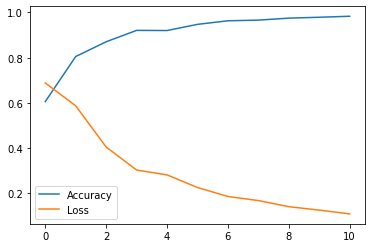

In [0]:
plt.plot(history.history['accuracy'],label="Accuracy")
plt.plot(history2.history['accuracy'],label="Accuracy2")
plt.legend()

In [0]:
plt.plot(history.history['loss'],label="Loss")
plt.plot(history2.history["loss"],label="Loss2")
plt.legend()

## **Change number of predictions here**

In [0]:
dataset_test=[str(a) for a in dataset_test['text']]

In [0]:
testy=dataset_test
for i,sen in enumerate(testy):
  testy[i]=tk1.encode(sen)
seq_testy_text=pad_sequences(testy,maxlen=max_length_text,truncating="post",padding="post")

In [0]:
prediction=model.predict(seq_testy_text)

In [0]:
classes=["Real","Fake"]

In [0]:
a=int(input())
print("Prediction is {}".format(classes[int(np.round(prediction[i][0]]))